In [8]:
import numpy as np, matplotlib.pyplot as plt, os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image, ImageOps

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("train:", x_train.shape, "test:", x_test.shape, "px range:", x_train.min(), "-", x_train.max())

train: (60000, 28, 28) test: (10000, 28, 28) px range: 0 - 255


In [10]:
x_train = (x_train.astype('float32')/255.0)[...,None]
x_test  = (x_test.astype('float32')/255.0)[...,None]
y_train = to_categorical(y_train,10); y_test = to_categorical(y_test,10)

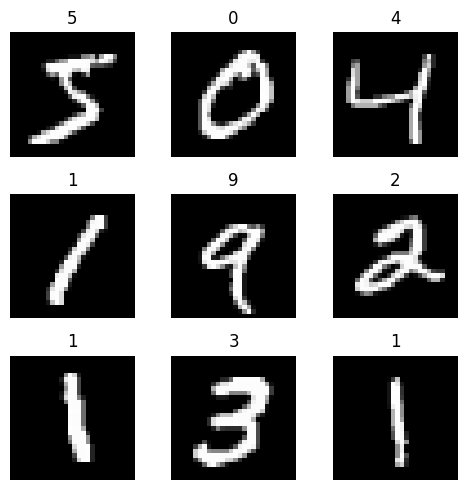

In [11]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1); plt.imshow(x_train[i].squeeze(), cmap='gray'); plt.title(f"{np.argmax(y_train[i])}"); plt.axis('off')
plt.tight_layout(); plt.show()

In [12]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
hist = model.fit(x_train, y_train, epochs=8, batch_size=128, validation_split=0.1, verbose=1)

Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8378 - loss: 0.5025 - val_accuracy: 0.9860 - val_loss: 0.0530
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9725 - loss: 0.0934 - val_accuracy: 0.9877 - val_loss: 0.0417
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9799 - loss: 0.0676 - val_accuracy: 0.9887 - val_loss: 0.0404
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9836 - loss: 0.0534 - val_accuracy: 0.9905 - val_loss: 0.0360
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9851 - loss: 0.0460 - val_accuracy: 0.9903 - val_loss: 0.0379
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9881 - loss: 0.0367 - val_accuracy: 0.9908 - val_loss: 0.0310
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9896 - loss: 0.0334 - val_accuracy: 0.9913 - val_loss: 0.0308
Epoch 8/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9903 -

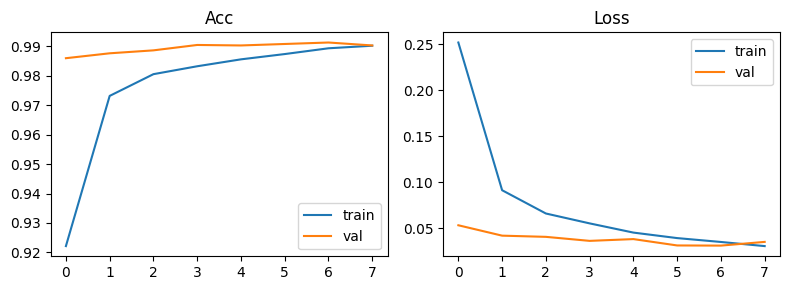

In [87]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1); plt.plot(hist.history['accuracy'],label='train'); plt.plot(hist.history['val_accuracy'],label='val'); plt.title('Acc'); plt.legend()
plt.subplot(1,2,2); plt.plot(hist.history['loss'],label='train'); plt.plot(hist.history['val_loss'],label='val'); plt.title('Loss'); plt.legend()
plt.tight_layout(); plt.show()

In [92]:
score = model.evaluate(x_test, to_categorical(y_test, 10), verbose=0)
print(f"Test acc: {score[1]:.4f} | Test loss: {score[0]:.4f}")

Test acc: 0.9913 | Test loss: 0.0294


In [16]:
from PIL import Image, ImageOps
import numpy as np

def preprocess_handwritten(path):
    img = Image.open(path).convert('L')                         # ubah ke grayscale
    img = ImageOps.invert(img)                                  # balik warna (angka jadi putih, background hitam)
    img = img.resize((28,28), Image.Resampling.LANCZOS)         # ubah ukuran ke 28x28
    arr = np.array(img).astype('float32') / 255.0               # normalisasi 0-1
    arr = (arr - arr.min()) / (arr.max() - arr.min() + 1e-8)    # pastikan nilai stabil
    return arr.reshape(1,28,28,1)

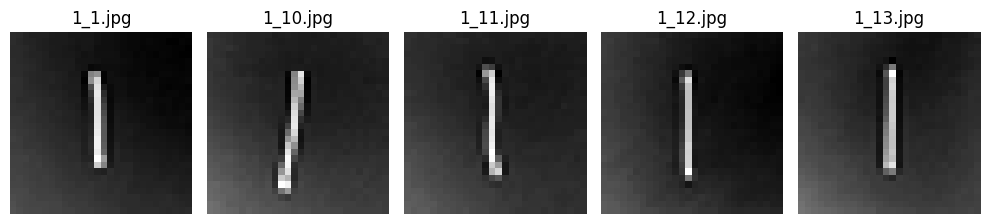

In [17]:
hand_dir = '/content/handwritten'
files = sorted([f for f in os.listdir(hand_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])

plt.figure(figsize=(10,3))
for i, f in enumerate(files[:5]):
    arr = preprocess_handwritten(os.path.join(hand_dir, f))
    plt.subplot(1,5,i+1)
    plt.imshow(arr.reshape(28,28), cmap='gray')
    plt.title(f)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
preds, truths = [], []

for f in files:
    true = int(f.split('_')[0])  # ambil label asli dari nama file
    arr = preprocess_handwritten(os.path.join(hand_dir, f))
    pred = np.argmax(model.predict(arr))
    preds.append(pred); truths.append(true)
    print(f"{f} → Prediksi: {pred} | Asli: {true} |", "Benar" if pred==true else "Salah")

acc_hand = np.mean(np.array(preds) == np.array(truths))
print(f"\nAkurasi pada tulisan tangan: {acc_hand*100:.2f}% dari {len(truths)} gambar")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1_1.jpg → Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1_10.jpg → Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1_11.jpg → Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1_12.jpg → Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1_13.jpg → Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1_14.jpg → Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1_15.jpg → Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1_16.jpg → Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1_17.jpg → Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1_18.jpg → Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1_19.jpg → Prediksi: 8 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1_2.jpg → Prediksi: 8 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1_20.jpg → Pred

In [65]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [66]:
target_size = (64, 64)

In [67]:
def mnist_to_rgb_resized(x):
    # x: bentuk array (N,28,28,1) dengan nilai dalam [0,1]
    N = x.shape[0]
    out = np.zeros((N, target_size[0], target_size[1], 3), dtype='float32')
    for i in range(N):
        img = (x[i].squeeze() * 255).astype('uint8')
        pil = Image.fromarray(img, mode='L')
        pil = ImageOps.invert(pil)
        pil = pil.resize(target_size, Image.Resampling.LANCZOS)
        arr = np.array(pil)
        rgb = np.stack([arr, arr, arr], axis=-1)  # grayscale -> RGB
        out[i] = rgb
    # praproses mobilenet mengharapkan float dalam rentang tertentu
    out = mobilenet_preprocess(out)  # skala ke -1..1 untuk MobileNetV2
    return out

In [68]:
x_train_rgb = mnist_to_rgb_resized(x_train)
x_test_rgb  = mnist_to_rgb_resized(x_test)

/tmp/ipython-input-2510955869.py:7: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil = Image.fromarray(img, mode='L')


In [76]:
def make_labels_and_onehot(y, num_classes=10):
    # y bisa 1D (ints) atau 2D (one-hot)
    if y.ndim == 1:
        y_int = y.astype('int')
    else:
        y_int = np.argmax(y, axis=1)
    y_cat = tf.keras.utils.to_categorical(y_int, num_classes)
    return y_int, y_cat

y_train_labels, y_train_cat_tf = make_labels_and_onehot(y_train, 10)
y_test_labels,  y_test_cat_tf  = make_labels_and_onehot(y_test, 10)

print("y_train_labels shape:", y_train_labels.shape)
print("y_train_cat_tf shape:", y_train_cat_tf.shape)

y_train_labels shape: (60000,)
y_train_cat_tf shape: (60000, 10)


In [77]:
base = MobileNetV2(include_top=False, weights='imagenet', input_shape=(target_size[0], target_size[1], 3))
base.trainable = False   # freeze backbone (latih hanya head dulu)

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(10, activation='softmax')(x)

model_b = Model(inputs=base.input, outputs=outputs)
model_b.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model_b.summary()

/tmp/ipython-input-3954990730.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = MobileNetV2(include_top=False, weights='imagenet', input_shape=(target_size[0], target_size[1], 3))


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 16, 16,    │      2,304 │ block_1_depthwis

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [78]:
epochs_b = 8
batch_size_b = 128

history_b = model_b.fit(
    x_train_rgb, y_train_cat_tf,
    epochs=epochs_b,
    batch_size=batch_size_b,
    validation_split=0.1,
    verbose=1
)

Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.5346 - loss: 1.4528 - val_accuracy: 0.9060 - val_loss: 0.3065
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8611 - loss: 0.4300 - val_accuracy: 0.9310 - val_loss: 0.2206
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8999 - loss: 0.3157 - val_accuracy: 0.9412 - val_loss: 0.1837
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9121 - loss: 0.2743 - val_accuracy: 0.9465 - val_loss: 0.1655
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9238 - loss: 0.2327 - val_accuracy: 0.9517 - val_loss: 0.1501
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9337 - loss: 0.2114 - val_accuracy: 0.9552 - val_loss: 0.1381
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9369 - loss: 0.1950 - val_accuracy: 0.9567 - val_loss: 0.1306
Epoch 8/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9418 - loss: 0.1809 - val_accuracy: 0

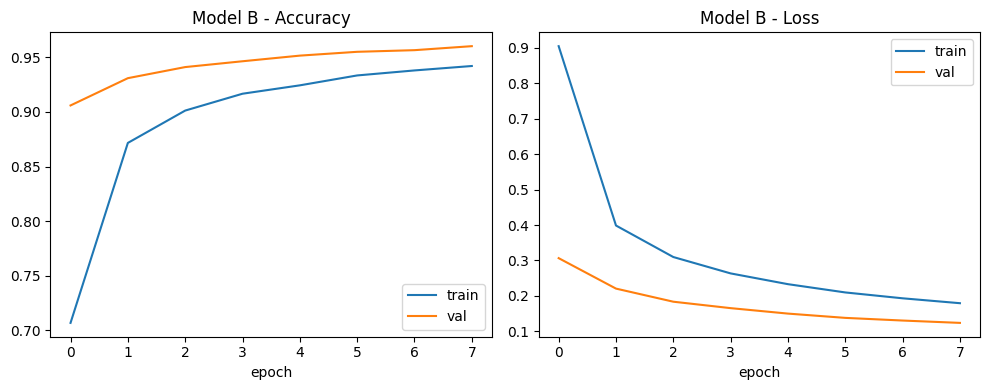

In [79]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_b.history['accuracy'], label='train')
plt.plot(history_b.history['val_accuracy'], label='val')
plt.title('Model B - Accuracy'); plt.xlabel('epoch'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_b.history['loss'], label='train')
plt.plot(history_b.history['val_loss'], label='val')
plt.title('Model B - Loss'); plt.xlabel('epoch'); plt.legend()

plt.tight_layout(); plt.show()

In [83]:
loss_b, acc_b = model_b.evaluate(x_test_rgb, y_test_cat_tf, verbose=0)
print(f"Model B - Test acc on MNIST (resized RGB): {acc_b*100:.4f}% | loss: {loss_b:.4f}")

Model B - Test acc on MNIST (resized RGB): 95.5300% | loss: 0.1378


In [84]:
def preprocess_handwritten_for_modelB(path):
    # path: path file ke gambar tulisan tangan (latar belakang putih, angka hitam)
    img = Image.open(path).convert('L')
    img = ImageOps.invert(img)   # buat digit putih di atas hitam untuk mencocokkan konversi pelatihan di atas
    img = img.resize(target_size, Image.Resampling.LANCZOS)
    arr = np.array(img).astype('float32')
    rgb = np.stack([arr, arr, arr], axis=-1)
    rgb = mobilenet_preprocess(rgb)  # -1..1
    return rgb.reshape(1, target_size[0], target_size[1], 3)

In [85]:
hand_dir = '/content/handwritten'
files = sorted([f for f in os.listdir(hand_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])

preds_b, truths = [], []
for f in files:
    true_label = int(f.split('_')[0])
    arr = preprocess_handwritten_for_modelB(os.path.join(hand_dir, f))
    p = np.argmax(model_b.predict(arr), axis=1)[0]
    preds_b.append(p); truths.append(true_label)
    print(f"{f} -> Prediksi: {p} | Asli: {true_label} |", "Benar" if p==true_label else "Salah")

acc_hand_b = np.mean(np.array(preds_b) == np.array(truths)) if truths else 0
print(f"\nModel B - Akurasi pada tulisan tangan: {acc_hand_b*100:.2f}% dari {len(truths)} gambar")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1_1.jpg -> Prediksi: 4 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1_10.jpg -> Prediksi: 0 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1_11.jpg -> Prediksi: 4 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1_12.jpg -> Prediksi: 4 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1_13.jpg -> Prediksi: 4 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1_14.jpg -> Prediksi: 1 | Asli: 1 | Benar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1_15.jpg -> Prediksi: 7 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1_16.jpg -> Prediksi: 0 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1_17.jpg -> Prediksi: 9 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1_18.jpg -> Prediksi: 4 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1_19.jpg -> Prediksi: 4 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1_2.jpg -> Prediksi: 7 | Asli: 1 | Salah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1_20.j

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


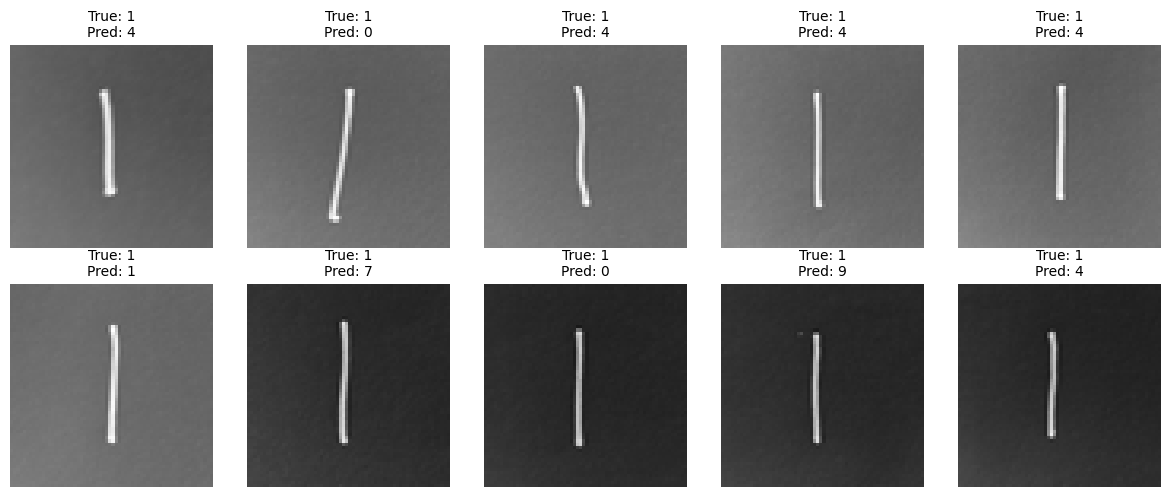

In [86]:
import matplotlib.pyplot as plt

# Tampilkan 10 gambar tulisan tangan dan hasil prediksi
plt.figure(figsize=(12, 5))
for i, f in enumerate(files[:10]):
    path = os.path.join(hand_dir, f)
    arr = preprocess_handwritten_for_modelB(path)
    pred = np.argmax(model_b.predict(arr), axis=1)[0]
    true = int(f.split('_')[0])

    # Konversi array jadi bisa ditampilkan (dari -1..1 ke 0..255)
    view = ((arr.squeeze() + 1.0) * 127.5).astype('uint8')

    plt.subplot(2, 5, i+1)
    plt.imshow(view)
    plt.title(f"True: {true}\nPred: {pred}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()